<a href="https://colab.research.google.com/github/Askoye/Electric-Car-Sharing-Company-Project/blob/master/Electric_Car_Sharing_Company_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Electric Car Sharing Company Project

**Defining the Question**

An electric car-sharing service company has delegated a task to process stations data in order to understand electric car usage over time by identifying the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

Bonus Questions
* What is the most popular hour for returning cars?
* What station is the most popular? Overall? At the most popular picking hour?
* What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code? Overall? At the most popular picking hour?
* Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

**Datasets Provided**

* You can get the data and the dataset description for this project here [http://bit.ly/Autolibdataset] and here respectively [https://drive.google.com/a/moringaschool.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view?usp=sharing]) . 

The dataset contains data collected for a period of 3 days. The dataset may take a bit of some time to load [~ 10 minutes]. 




### Importing our Libraries

In [ ]:
# Importing the required libraries
# ---
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading our Datasets

In [ ]:
# Dataset 1
# ---
# Loading dataset 1 
# ---
# 
df = pd.read_csv('http://bit.ly/Autolibdataset')
df.head()

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


### Exploration

In [ ]:
# Dataset 1
# ---
# Checking the information for dataset 1
# ---
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14421829 entries, 0 to 14421828
Data columns (total 26 columns):
Unnamed: 0             int64
Address                object
Cars                   int64
Bluecar counter        int64
Utilib counter         int64
Utilib 1.4 counter     int64
Charge Slots           int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code            int64
Public name            object
Rental status          object
Scheduled at           object
Slots                  int64
Station type           object
Status                 object
Subscription status    object
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
dtypes: int64(13), object(13)
memory usage: 2.8+ GB


In [ ]:
# Determining the shape of our dataset
# ---
# 
df.shape

(14421829, 26)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

### Data Cleaning 

In [ ]:
# Data cleaning: Dropping irrelevant columns
# ---
# -> Dropping irrelevant columns 
# ---
# 
df.drop(['Unnamed: 0','Cars', 'Displayed comment'], axis = 1, inplace = True)
df.shape

(14421829, 23)

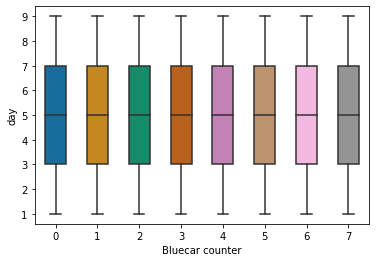

In [ ]:
# Data Cleaning: Outliers - 1
# ---
# -> Checking for outliers
# ---
# 
# Checking for outliers of Bluecars by day
# ---
bplot=sns.boxplot( x ='Bluecar counter', y= 'day',
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# Observation
# ---
# There are no outliers
# ---

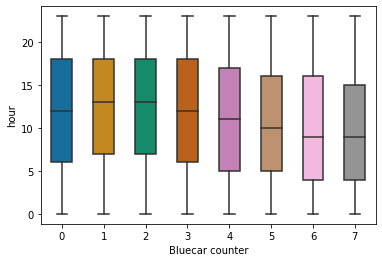

In [ ]:
# Data Cleaning: Outliers - 2
# ---
# -> Checking for outliers
# ---
# 
# Checking outliers of Bluecars by hour
bplot=sns.boxplot( x ='Bluecar counter', y= 'hour',
                 data=df, 
                 width=0.5,
                 palette="colorblind")
# Observation
# ---
# There are no outliers
# ---

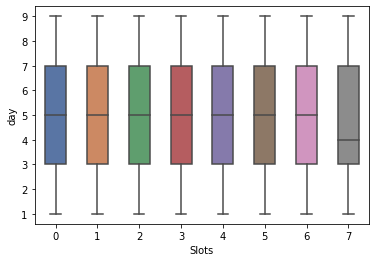

In [ ]:
# Data Cleaning: Outliers - 3
# ---
# -> Checking for outliers
# ---
# 
# Checking outliers of Slots by days
bplot2=sns.boxplot( x ='Slots', y='day',
                 data=df, 
                 width=0.5,
                 palette="deep")
# Observation
# ---
# There are no outliers
# ---

In [ ]:
# Data Cleaning: Missing Data
# ---
# -> Checking for missing data
# ---
# 

df.isnull().sum()

# Observation
# ---
# Scheduled at column has many missing values

# Recommendation
# ---
# Retain the column as it may be important

Address                       0
Bluecar counter               0
Utilib counter                0
Utilib 1.4 counter            0
Charge Slots                  0
Charging Status               0
City                          0
ID                            0
Kind                          0
Geo point                     0
Postal code                   0
Public name                   0
Rental status                 0
Scheduled at           14310213
Slots                         0
Station type                  0
Status                        0
Subscription status           0
year                          0
month                         0
day                           0
hour                          0
minute                        0
dtype: int64

In [ ]:
# Data Cleaning: Dropping duplicates
# ---
# -> Dropping duplicate records
# ---
# 
df = df.drop_duplicates()
df.shape

(14278939, 23)

In [ ]:
# Data Cleaning: Standardization - 1
# ---
# -> Removing spaces and converting column names to lower case 
# ---
# 
# 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Data Pre-processing: 
# ---
# -> Adding 3  columns that will provide the status for the three cars.
# - Positive number means that a car was returned
# - Negative number means that a car was picked
# - Zero means that nothing happened (that the no car was picked nor returned)
# ---
# 
df['bluecar_status'] = df.bluecar_counter.diff()
df['utilib_status'] = df.utilib_counter.diff()
df['utilib_14_status'] = df["utilib_1.4_counter"].diff()

### Performing Data Analysis

#### 1. Blue Car

In [ ]:
# Question 1
# ---
# What is the most popular hour of the day for picking up an electric blue car?
# ---
# 
df[(df.city == 'Paris') & (df.bluecar_status < 0)].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
4    148287
Name: hour, dtype: int64

In [ ]:
# Question 2
# ---
# What is the most popular hour of the day for returning blue cars?
# ---
# 
df[df.bluecar_status > 0].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
21    249651
Name: hour, dtype: int64

In [ ]:
# Question 3
# ---
# Which station are blue cars mostly picked?
# ---
# 
df[(df['bluecar_status'] < 0)& (df['status']=='ok')&(df['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Malakoff/Charles de Gaulle/Parking    9135
Name: public_name, dtype: int64

In [ ]:
# Question 4
# ---
# Which station are blue cars mostly returned?
# ---
# 
df[(df['bluecar_status'] > 0)& (df['status']=='ok')&(df['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]


public_name
Colombes/MarÃ©chal Joffre/30    9826
Name: public_name, dtype: int64

In [ ]:
# Question 5
# ---
# Which is the most popular postal code for picking blue cars?
# ---
# 
df[(df['bluecar_status'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75015    287141
Name: postal_code, dtype: int64

In [ ]:
# Question 6
# ---
# Which is the most popular postal code for returning blue cars?
# ---
# 
df[(df['bluecar_status'] > 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75016    314044
Name: postal_code, dtype: int64

#### 2. Utilib

In [ ]:
# Question 1
# ---
# What is the most popular hour of the day for picking up an electric utilib car?
# ---
# 
df[(df.city == 'Paris') & (df.utilib_status < 0)].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
5    19606
Name: hour, dtype: int64

In [ ]:
# Question 2
# ---
# What is the most popular hour of the day for returning utilib cars?
# ---
# 
df[df.utilib_status > 0].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
5    38106
Name: hour, dtype: int64

In [ ]:
# Question 3
# ---
# Which station are utilib cars mostly picked from?
# ---
# 
df[(df['utilib_status'] < 0)& (df['status']=='ok')&(df['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Boulogne-Billancourt/Gallieni/114    1711
Name: public_name, dtype: int64

In [ ]:
# Question 4
# ---
# Which station are utilib cars mostly returned?
# ---
# 
df[(df['utilib_status'] > 0)& (df['status']=='ok')&(df['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Nanterre/Gambetta/20    3020
Name: public_name, dtype: int64

In [ ]:
# Question 5
# ---
# Which is the most popular postal code for picking utilib cars?
# ---
# 
df[(df['utilib_status'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75015    45004
Name: postal_code, dtype: int64

In [ ]:
# Question 6
# ---
# Which is the most popular postal code for picking utilib cars?
# ---
# 
df[(df['utilib_status'] > 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75016    45928
Name: postal_code, dtype: int64

#### 3. Utilib 1.4

In [ ]:
# Question 1
# ---
# What is the most popular hour of the day for picking up an electric utilib 1.4 car?
# ---
# 
df[(df.city == 'Paris') & (df['utilib_14_status'] < 0)].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
6    36246
Name: hour, dtype: int64

In [ ]:
# Question 2
# ---
# What is the most popular hour of the day for returning utilib 1.4 cars?
# ---
# 
df[(df.city == 'Paris') & (df.utilib_status > 0)].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
7    17364
Name: hour, dtype: int64

In [ ]:
# Question 3
# ---
# Which station are utilib 1.4 cars mostly picked from?
# ---
# 
df[(df['utilib_14_status'] < 0)& (df['status']=='ok')&(df['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Malakoff/Charles de Gaulle/Parking    2179
Name: public_name, dtype: int64

In [ ]:
# Question 4
# ---
# Which station are utilib 1.4 cars mostly returned?
# ---
# 
df[(df['utilib_14_status'] > 0)& (df['status']=='ok')&(df['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]


public_name
Fontenay-Sous-Bois/Rabelais/12    4893
Name: public_name, dtype: int64

In [ ]:
# Question 5
# ---
# Which is the most popular postal code for picking utilib 1.4 cars?
# ---
# 
df[(df['utilib_14_status'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75015    73083
Name: postal_code, dtype: int64

In [ ]:
# Question 6
# ---
# Which is the most popular postal code for picking utilib 1.4 cars?
# ---
# 
df[(df['utilib_14_status'] > 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75015    88264
Name: postal_code, dtype: int64